Importing Relevant Libraries

In [41]:
# Standard analytics packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import useful packages from sklearn
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer as Imputer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier

#import stats library
import scipy.stats as stats

# Pre-Process & Data Cleaning

Load Data and Store them as ***df_train*** and ***df_test***

In [10]:

df_train = pd.read_csv("/content/drive/MyDrive/MIE368/Binance Assessment/cs-training.csv")
df_test = pd.read_csv("/content/drive/MyDrive/MIE368/Binance Assessment/cs-test.csv")

df_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


Re-indexing dataframes

In [11]:
df_train = df_train.drop(df_train.columns[0], axis = 1)
df_test = df_test.drop(df_test.columns[0], axis = 1)
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [12]:
df_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


It is interesting to see that the maximum values for all the numder of times x amount of days late is 98, which by doing simple math, that does not make sense at all, and there seems to be an error in the data, further investigation is required.

In [5]:
print(f'The size of df_train is {df_train.shape}')
print(f'The size of df_test is {df_test.shape}')

The size of df_train is (150000, 11)
The size of df_test is (101503, 11)


Creating new dataframe which has columns in desired order for the remainder of analysis

In [13]:
columns = df_train.columns.tolist()

df_train_columns_sorted = columns[:3] + columns[4:6] + columns[3:4] + columns[6:]
df_train = df_train[df_train_columns_sorted]
df_test = df_test[df_train_columns_sorted]
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,0.802982,9120.0,2,13,0,6,0,2.0
1,0,0.957151,40,0.121876,2600.0,0,4,0,0,0,1.0
2,0,0.658180,38,0.085113,3042.0,1,2,1,0,0,0.0
3,0,0.233810,30,0.036050,3300.0,0,5,0,0,0,0.0
4,0,0.907239,49,0.024926,63588.0,1,7,0,1,0,0.0


Lets visualize some data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


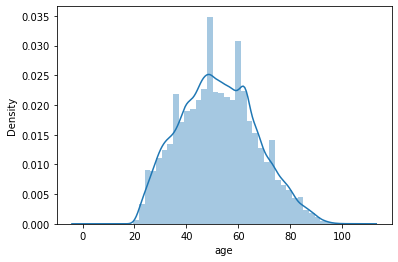

In [16]:
sns.distplot(df_train["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


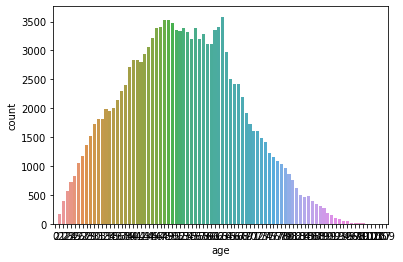

In [18]:
sns.countplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 0]["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


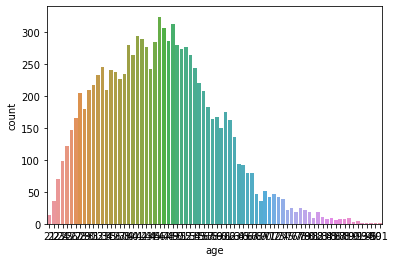

In [19]:
sns.countplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 1]["age"])

As we can see from the data it seems that the majority of borrowers that default are 'young' which practically makes sense and the distribution seems to be alright, and seems to be a feature that will be important moving forward.

Next lets check what we can find in columns that give data on x number of days late.

In [20]:
df_train["NumberOfTimes90DaysLate"].value_counts().sort_index()

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In [21]:
df_train["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [22]:
df_train["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

This is funny, all of them seem to have the same number of instances for 96 and 98 times past due notices, which again does not make sense, therefore moving forward will set NumberOfTimes90DaysLate to equal to and less than 17 and will ignore the 96 and 98 instances

Taking a look at monthly income

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


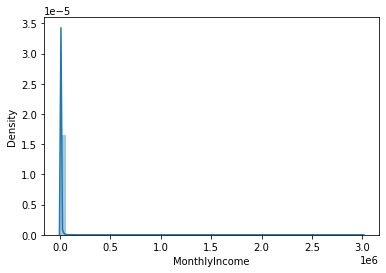

In [24]:
sns.distplot(df_train["MonthlyIncome"].dropna())

Monthly income is skewed therefore moving forward will impute either using mean or median. Can test with both

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


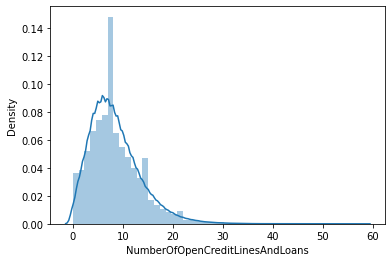

In [26]:
sns.distplot(df_train["NumberOfOpenCreditLinesAndLoans"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


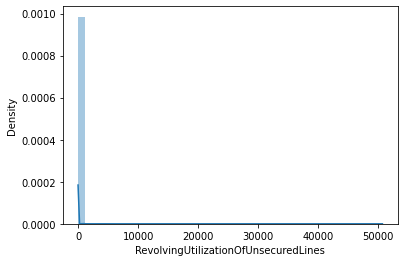

In [27]:
sns.distplot(df_train["RevolvingUtilizationOfUnsecuredLines"])

It seems revolving utilization is also skewed

In [32]:
df_train["RevolvingUtilizationOfUnsecuredLines"].value_counts().sort_index()

0.000000        10878
0.000008            1
0.000010            1
0.000013            1
0.000014            1
                ...  
20514.000000        1
22000.000000        1
22198.000000        1
29110.000000        1
50708.000000        1
Name: RevolvingUtilizationOfUnsecuredLines, Length: 125728, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


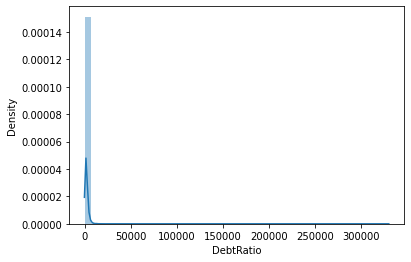

In [28]:
sns.distplot(df_train["DebtRatio"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


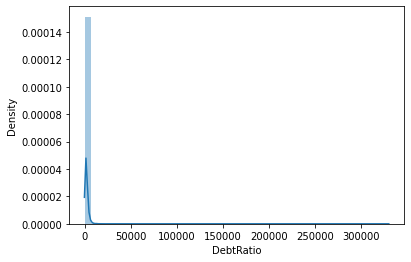

In [29]:
sns.distplot(df_train["DebtRatio"])

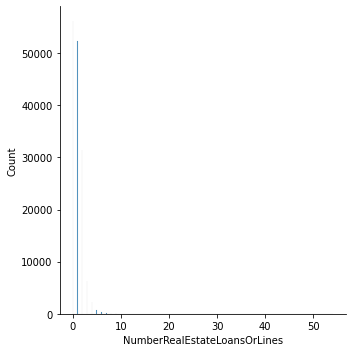

In [30]:
sns.displot(df_train["NumberRealEstateLoansOrLines"])

Taking care of missing values - train data

In [14]:
df_train.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfTime30-59DaysPastDueNotWorse      int64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [15]:
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfTime30-59DaysPastDueNotWorse        0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [34]:
imp_median = Imputer(strategy = 'median')
imp_mode = Imputer(strategy = 'most_frequent')

imp_median.fit(df_train[['MonthlyIncome']])
imp_mode.fit(df_train[['NumberOfDependents']])

df_train[['MonthlyIncome']] = imp_median.transform(df_train[['MonthlyIncome']])
df_train[['NumberOfDependents']] = imp_mode.transform(df_train[['NumberOfDependents']])

df_train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
DebtRatio                               0
MonthlyIncome                           0
NumberOfTime30-59DaysPastDueNotWorse    0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Taking care of for missing values - testing data

In [35]:
df_test.dtypes

SeriousDlqin2yrs                        float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfTime30-59DaysPastDueNotWorse      int64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [36]:
df_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfTime30-59DaysPastDueNotWorse         0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [99]:
imp_median.fit(df_test[['MonthlyIncome']])
imp_mode.fit(df_test[['NumberOfDependents']])

df_test[['MonthlyIncome']] = imp_median.transform(df_test[['MonthlyIncome']])
df_test[['NumberOfDependents']] = imp_mode.transform(df_test[['NumberOfDependents']])

df_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfTime30-59DaysPastDueNotWorse         0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

Altering dataframe to make sure only 'proper' values are used and limit error in data

In [101]:
df_train = df_train[df_train['age'] > 0]
df_test = df_test[df_test['age'] > 0]

In [127]:
df_train = df_train[df_train['NumberOfTime30-59DaysPastDueNotWorse'] < 90] 
df_train = df_train[df_train['NumberOfTimes90DaysLate'] < 90] 
df_train = df_train[df_train['NumberOfTime60-89DaysPastDueNotWorse'] < 90] 

In [103]:
df_train = df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] < 13]
df_test = df_test[df_test['RevolvingUtilizationOfUnsecuredLines'] < 13]

In [104]:
df_train = df_train.loc[df_train["DebtRatio"] <= df_train["DebtRatio"].quantile(0.975)]
df_test = df_test.loc[df_test["DebtRatio"] <= df_test["DebtRatio"].quantile(0.975)]

In [128]:
df_train.shape

(142116, 11)

In [105]:
df_test.shape

(98610, 11)

# Part 1 

Checking for Correlations between 

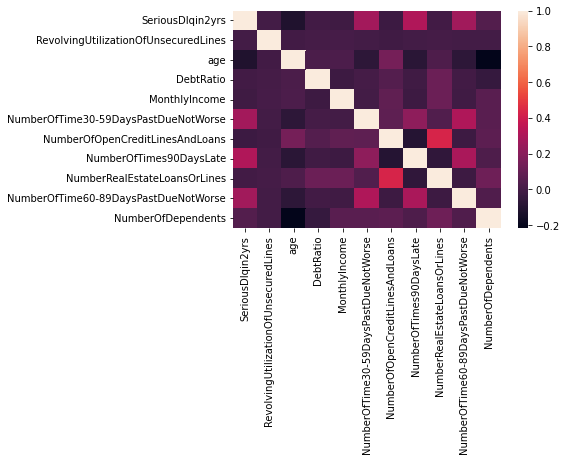

In [43]:
sns.heatmap(df_train.corr(), annot = False)

In [44]:
df_train.corr()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001744,-0.112979,-0.007069,-0.016531,0.274553,-0.024232,0.314535,-0.003957,0.268130,0.048320
RevolvingUtilizationOfUnsecuredLines,-0.001744,1.000000,-0.005955,0.003955,0.006506,-0.002818,-0.011368,-0.001808,0.006207,-0.002441,0.001180
age,-0.112979,-0.005955,1.000000,0.023857,0.027180,-0.071845,0.144742,-0.082392,0.031280,-0.069854,-0.217236
DebtRatio,-0.007069,0.003955,0.023857,1.000000,-0.018070,0.003492,0.049183,-0.009848,0.119862,-0.004196,-0.044614
MonthlyIncome,-0.016531,0.006506,0.027180,-0.018070,1.000000,0.000027,0.086574,-0.017758,0.116041,-0.009912,0.066193
NumberOfTime30-59DaysPastDueNotWorse,0.274553,-0.002818,-0.071845,0.003492,0.000027,1.000000,0.080073,0.218149,0.042756,0.305879,0.065611
NumberOfOpenCreditLinesAndLoans,-0.024232,-0.011368,0.144742,0.049183,0.086574,0.080073,1.000000,-0.093869,0.432669,-0.021907,0.073154
NumberOfTimes90DaysLate,0.314535,-0.001808,-0.082392,-0.009848,-0.017758,0.218149,-0.093869,1.000000,-0.062471,0.294638,0.031335
NumberRealEstateLoansOrLines,-0.003957,0.006207,0.031280,0.119862,0.116041,0.042756,0.432669,-0.062471,1.000000,-0.020695,0.128962
NumberOfTime60-89DaysPastDueNotWorse,0.268130,-0.002441,-0.069854,-0.004196,-0.009912,0.305879,-0.021907,0.294638,-0.020695,1.000000,0.037633


In [45]:
from statsmodels.regression import linear_model
X = df_train.drop('SeriousDlqin2yrs', axis=1)
y = df_train['SeriousDlqin2yrs']
model = linear_model.OLS(y, X).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       SeriousDlqin2yrs   R-squared (uncentered):                   0.214
Model:                            OLS   Adj. R-squared (uncentered):              0.214
Method:                 Least Squares   F-statistic:                              4073.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                        0.00
Time:                        20:24:40   Log-Likelihood:                          9071.9
No. Observations:              149730   AIC:                                 -1.812e+04
Df Residuals:                  149720   BIC:                                 -1.802e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
RevolvingUtilizationOfUnsecuredLines   2.02e-07   2.35e-06      0.086      0.932   -4.41e-06    4.82e-06
age                                      0.0002   2.07e-05     11.526      0.000       0.000       0.000
DebtRatio                            -2.701e-07   2.91e-07     -0.927      0.354   -8.41e-07    3.01e-07
MonthlyIncome                        -1.118e-07    4.6e-08     -2.430      0.015   -2.02e-07   -2.16e-08
NumberOfTime30-59DaysPastDueNotWorse     0.0649      0.001     72.116      0.000       0.063       0.067
NumberOfOpenCreditLinesAndLoans          0.0006      0.000      4.354      0.000       0.000       0.001
NumberOfTimes90DaysLate                  0.1215      0.001     94.572      0.000       0.119       0.124
NumberRealEstateLoansOrLines             0.0036      0.001      6.183      0.000       0.002       0.005
NumberOfTime60-89DaysPastDueNotWorse     0.1103      0.002     57.130      0.000       0.107       0.114
NumberOfDependents                       0.0086      0.001     16.379      0.000       0.008       0.010
==============================================================================
Omnibus:                    93140.761   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           917248.153
Skew:                           2.950   Prob(JB):                         0.00
Kurtosis:                      13.593   Cond. No.                     4.86e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
from sklearn.preprocessing import PolynomialFeatures
#generating interaction terms
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)


In [48]:
#creating a new dataframe with the interaction terms included
# interaction_df = pd.DataFrame(x_interaction, columns = ['RevolvingUtilizationOfUnsecuredLines','age','DebtRatio','MonthlyIncome','NumberOfTime30-59DaysPastDueNotWorse','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'
#                                                         'RevolvingUtilizationOfUnsecuredLines:DebtRatio', 'RevolvingUtilizationOfUnsecuredLines:NumberOfTime30-59DaysPastDueNotWorse', 'RevolvingUtilizationOfUnsecuredLines:NumberOfOpenCreditLinesAndLoans', 'RevolvingUtilizationOfUnsecuredLines:NumberOfTimes90DaysLate', 'RevolvingUtilizationOfUnsecuredLines:NumberRealEstateLoansOrLines', 'RevolvingUtilizationOfUnsecuredLines:NumberOfTime60-89DaysPastDueNotWorse', 
#                                                         'DebtRatio:RevolvingUtilizationOfUnsecuredLines', 'DebtRatio:NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio:NumberOfOpenCreditLinesAndLoans', 'DebtRatio:NumberOfTimes90DaysLate', 'DebtRatio:NumberRealEstateLoansOrLines', 'DebtRatio:NumberOfTime60-89DaysPastDueNotWorse',
#                                                         'NumberOfTime30-59DaysPastDueNotWorse:RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime30-59DaysPastDueNotWorse:DebtRatio', 'NumberOfTime30-59DaysPastDueNotWorse:MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse:NumberOfOpenCreditLinesAndLoans', 'NumberOfTime30-59DaysPastDueNotWorse:NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse:NumberRealEstateLoansOrLines', 'NumberOfTime30-59DaysPastDueNotWorse:NumberOfTime60-89DaysPastDueNotWorse', 
#                                                         'NumberOfOpenCreditLinesAndLoans:RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans:DebtRatio', 'NumberOfOpenCreditLinesAndLoans:MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans:NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfOpenCreditLinesAndLoans:NumberOfTimes90DaysLate', 'NumberOfOpenCreditLinesAndLoans:NumberRealEstateLoansOrLines', 'NumberOfOpenCreditLinesAndLoans:NumberOfTime60-89DaysPastDueNotWorse', 
#                                                         'NumberOfTimes90DaysLate:RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate:DebtRatio', 'NumberOfTimes90DaysLate:MonthlyIncome', 'NumberOfTimes90DaysLate:NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate:NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate:NumberRealEstateLoansOrLines', 'NumberOfTimes90DaysLate:NumberOfTime60-89DaysPastDueNotWorse', 
#                                                         'NumberRealEstateLoansOrLines:RevolvingUtilizationOfUnsecuredLines', 'NumberRealEstateLoansOrLines:DebtRatio', 'NumberRealEstateLoansOrLines:NumberOfTime30-59DaysPastDueNotWorse', 'NumberRealEstateLoansOrLines:NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines:NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines:NumberOfTime60-89DaysPastDueNotWorse', 
#                                                         'NumberOfTime60-89DaysPastDueNotWorse:RevolvingUtilizationOfUnsecuredLines', 'NumberOfTime60-89DaysPastDueNotWorse:DebtRatio', 'NumberOfTime60-89DaysPastDueNotWorse:MonthlyIncome', 'NumberOfTime60-89DaysPastDueNotWorse:NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse:NumberOfOpenCreditLinesAndLoans', 'NumberOfTime60-89DaysPastDueNotWorse:NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse:NumberRealEstateLoansOrLines'
#                                                         ])

In [50]:
# interaction_model = linear_model.OLS(y, interaction_df).fit()

In [139]:
# interaction_model.pvalues[interaction_model.pvalues < 0.05]

age                                                                           9.068565e-39
MonthlyIncome                                                                 1.237248e-05
NumberOfTime30-59DaysPastDueNotWorse                                         1.868334e-172
NumberOfOpenCreditLinesAndLoans                                               3.020686e-32
NumberOfTimes90DaysLate                                                      3.597717e-125
NumberOfTime60-89DaysPastDueNotWorse                                          1.059059e-83
NumberOfDependentsRevolvingUtilizationOfUnsecuredLines:DebtRatio              4.261221e-36
DebtRatio:RevolvingUtilizationOfUnsecuredLines                                3.933446e-02
DebtRatio:NumberOfOpenCreditLinesAndLoans                                     3.114518e-03
DebtRatio:NumberOfTime60-89DaysPastDueNotWorse                                3.783506e-07
NumberOfTime30-59DaysPastDueNotWorse:RevolvingUtilizationOfUnsecuredLines     4.162276e-26

In [51]:
df_train.describe()['SeriousDlqin2yrs'][1]

0.06597876177118814

In [52]:
summary_df = df_train.groupby('SeriousDlqin2yrs').sum()

fraction = summary_df.loc[1] / summary_df.loc[0]
fraction.idxmax()


'NumberOfTimes90DaysLate'

In [53]:
correlation_vector = df_train.corr().SeriousDlqin2yrs.drop('SeriousDlqin2yrs')
correlation_vector.abs().idxmax()

'NumberOfTimes90DaysLate'

# Part 2

In [54]:
def make_models():
  """Makes a dictionary of four untrained models"""
  
  return {
      'LR_L2': LogisticRegression(random_state=0, max_iter=1000),
      'LR_L1': LogisticRegression(random_state=0, penalty='l1', solver='liblinear', class_weight='balanced', max_iter=500),
      'CART': DecisionTreeClassifier(random_state=0, class_weight='balanced'),
      'RF': RandomForestClassifier(random_state=0, class_weight='balanced'),
  }

In [55]:
# Initialize a tuple of names for each model
model_names = ('LR_L2',  # Logistic regression with L2 regularizer
               'LR_L1',  # Logistic regression with L1 regularizer
               'CART',  # CART tree classifier
               'RF'  # Random forest classifier 
               )
# Initialize a tuple of technique names that we will cover
engineering_techniques = ('Baseline',  # Set of baseline models
                          'Scaling',  # Set of models trained with scaled data
                          'Feature Engineering',  # Set of models trained with engineered features
                          'Feature_Selection',  # Set of models trained with "selected" features
                          'Grid Search',  # Set of models trained via grid search
                          'Stacking',  # Set of stacked model 
                          'Bagging'  # A bagged model
                          )

# Initialize the multi indices of the `all_models` data frame
df_indices = pd.MultiIndex.from_product([model_names, engineering_techniques], names=('model names', 'technique'))
# Initialize the `all_models` data frame
all_models = pd.DataFrame(index=df_indices, columns=['Precision', 'Recall', 'Score', 'Model'])
all_models[['Precision', 'Recall', 'Score']] = all_models[['Precision', 'Recall', 'Score']].astype(float)
all_models  # Initialized data frame only has NaNs, which is perfect!

Precision  Recall  Score Model
model names technique                                          
LR_L2       Baseline                   NaN     NaN    NaN   NaN
            Scaling                    NaN     NaN    NaN   NaN
            Feature Engineering        NaN     NaN    NaN   NaN
            Feature_Selection          NaN     NaN    NaN   NaN
            Grid Search                NaN     NaN    NaN   NaN
            Stacking                   NaN     NaN    NaN   NaN
            Bagging                    NaN     NaN    NaN   NaN
LR_L1       Baseline                   NaN     NaN    NaN   NaN
            Scaling                    NaN     NaN    NaN   NaN
            Feature Engineering        NaN     NaN    NaN   NaN
            Feature_Selection          NaN     NaN    NaN   NaN
            Grid Search                NaN     NaN    NaN   NaN
            Stacking                   NaN     NaN    NaN   NaN
            Bagging                    NaN     NaN    NaN   NaN
CART        Baseline                   NaN     NaN    NaN   NaN
            Scaling                    NaN     NaN    NaN   NaN
            Feature Engineering        NaN     NaN    NaN   NaN
            Feature_Selection          NaN     NaN    NaN   NaN
            Grid Search                NaN     NaN    NaN   NaN
            Stacking                   NaN     NaN    NaN   NaN
            Bagging                    NaN     NaN    NaN   NaN
RF          Baseline                   NaN     NaN    NaN   NaN
            Scaling                    NaN     NaN    NaN   NaN
            Feature Engineering        NaN     NaN    NaN   NaN
            Feature_Selection          NaN     NaN    NaN   NaN
            Grid Search                NaN     NaN    NaN   NaN
            Stacking                   NaN     NaN    NaN   NaN
            Bagging                    NaN     NaN    NaN   NaN

Before fitting and training data need to define x_train, y_train, x_test and y_test

In [129]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=['SeriousDlqin2yrs']),
                                                    df_train.SeriousDlqin2yrs,
                                                    test_size = 0.15,
                                                    random_state = 2000,
                                                    stratify = df_train.SeriousDlqin2yrs)

In [57]:
# from sklearn.metrics import precision_score, recall_score

def fit_and_score_model(all_models, stage_name, X_train, X_out_of_sample, y_train, y_out_of_sample):
    """Fits the models that are initialized by models_dict on the X_train and y_train
    data, and evaluates the model on the out-of-sample data X_out_of_sample and y_out_of_sample"""
    
    # Make a dictionary of models
    models_dict = make_models()

    # Loop through each model in model_dict
    for model_name in models_dict:
        model = models_dict[model_name]

        # Write your code here.  
        # -------------------------------------------------------------------------
        model.fit(X_train, y_train)  # fit the model
        model_precision = precision_score(y_out_of_sample, model.predict(X_out_of_sample))  # evaluate precision on test set
        model_recall = recall_score(y_out_of_sample, model.predict(X_out_of_sample))  # evaluate recall on test set
        model_score = (model_precision + model_recall) / 2
        # -------------------------------------------------------------------------
        print(f'{model_name} achieved a precision of {model_precision:.3f} and recall of {model_recall:.3f}')
        
        all_models.loc[model_name, stage_name] = np.array((model_precision, model_recall, model_score, model), dtype='object')

    return all_models
    
all_models = fit_and_score_model(all_models, 'Baseline', X_train, X_test, y_train, y_test)
all_models.loc[:, 'Baseline', :].head()

LR_L2 achieved a precision of 0.567 and recall of 0.146
LR_L1 achieved a precision of 0.240 and recall of 0.590
CART achieved a precision of 0.235 and recall of 0.230
RF achieved a precision of 0.539 and recall of 0.151


,,Precision,Recall,Score,Model
model names,technique,,,,
LR_L2,Baseline,0.567493,0.145789,0.356641,"LogisticRegression(max_iter=1000, random_state=0)"
LR_L1,Baseline,0.240138,0.590234,0.415186,"LogisticRegression(class_weight='balanced', ma..."
CART,Baseline,0.234657,0.230007,0.232332,DecisionTreeClassifier(class_weight='balanced'...
RF,Baseline,0.539241,0.150743,0.344992,"(DecisionTreeClassifier(max_features='auto', r..."


In [58]:
y_test_predictions_LR = all_models.Model.loc['LR_L2','Baseline'].predict(X_test)

y_test_predictions_LR.mean() 

0.01616206589492431

In [59]:
technique_name = 'Scaling'

def standardize_data(X_train, X_out_of_sample):
    """standardizes all of the data in X_train and X_out_of_sample. The mean and
    standard deviation of each feature (i.e., each column) from the X_train
    data is used to standardize both the X_train and X_out_of sample."""

    # Initialize data frame for scaled data
    X_train_standardized = X_train.copy()
    X_out_of_sample_standardized = X_out_of_sample.copy()

    # Define scaling function
    scaler = StandardScaler()
    
    # -------------------------------------------------------------------------

    scaler.fit(X_train)

    X_train_standardized.loc[:]  = scaler.transform(X_train)
    X_out_of_sample_standardized.loc[:] = scaler.transform(X_out_of_sample)
                        
    # -------------------------------------------------------------------------

    return X_train_standardized, X_out_of_sample_standardized, scaler

# Make new data that is scaled"
X_train_scaled, X_test_scaled, scaler = standardize_data(X_train, X_test)

# Fit and score a model trained with scaled data
all_models = fit_and_score_model(all_models, technique_name, X_train_scaled, X_test_scaled, y_train, y_test)
all_models.loc[:, technique_name, :].head()

LR_L2 achieved a precision of 0.580 and recall of 0.144
LR_L1 achieved a precision of 0.240 and recall of 0.590
CART achieved a precision of 0.228 and recall of 0.229
RF achieved a precision of 0.526 and recall of 0.145


,,Precision,Recall,Score,Model
model names,technique,,,,
LR_L2,Scaling,0.580000,0.143666,0.361833,"LogisticRegression(max_iter=1000, random_state=0)"
LR_L1,Scaling,0.240000,0.590234,0.415117,"LogisticRegression(class_weight='balanced', ma..."
CART,Scaling,0.227848,0.229299,0.228574,DecisionTreeClassifier(class_weight='balanced'...
RF,Scaling,0.525641,0.145081,0.335361,"(DecisionTreeClassifier(max_features='auto', r..."


In [60]:
def compare_models(technique_name):
  """Prints out the average and biggest improvement observed between the 
  models trained with technique_name and the Baseline models"""

  # Evaluate score differences
  score_differences = (all_models.loc[:, technique_name, :].Score.values - all_models.loc[:, 'Baseline', :].Score.values)
  
  # Get the average and biggest score improvement
  mean_score_difference = score_differences.mean()
  most_score_improvement = score_differences.max()

  print(f'On average, scores improved by {mean_score_difference:.3f}, and the most improvement was {most_score_improvement:.3f}')

In [61]:
%%capture --no-stdout  
# from sklearn.feature_selection import f_classif
# Create a list of F-values for the existing features
feature_F_scores, _ = f_classif(X_train, y_train)

# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train.columns):
  for f2_index, f2 in enumerate(X_train.columns[f1_index + 1:]):
    # Multiply the two features to create a new feature
    new_feature = X_train[[f1]].multiply(X_train[f2], axis=0)
    # Evaluate F-value of new feature
    F_Score_new, p_value_new = f_classif(new_feature, y_train)
    # Evaluate the relative improvement of the new feature
    F_score_improvement = F_Score_new[0] / max(feature_F_scores[[f1_index, f2_index]])
    # Print out features that is sufficiently improved 
    if F_score_improvement >= 1.5 and F_Score_new[0] >= 75 and p_value_new < 0.05:
        '''Note that F_score_improvement >= 1.5 and F_Score_new[0] >= 75 is
         relatively arbitrary, and that other values could be used.'''
        print(f'{f1} + {f2} has an F-score of {F_Score_new[0]:.2f}')
        print(f'\tBetter by a factor of {F_score_improvement:.2f} over features in isolation')
        print(f'\tThe result is significant (p = {p_value_new})')

age + NumberOfTime30-59DaysPastDueNotWorse has an F-score of 8736.59
	Better by a factor of 5.17 over features in isolation
	The result is significant (p = [0.])
DebtRatio + NumberOfTimes90DaysLate has an F-score of 1131.57
	Better by a factor of 33.62 over features in isolation
	The result is significant (p = [5.55728995e-247])
DebtRatio + NumberOfTime60-89DaysPastDueNotWorse has an F-score of 654.83
	Better by a factor of 8.60 over features in isolation
	The result is significant (p = [4.61480893e-144])
MonthlyIncome + NumberOfTime30-59DaysPastDueNotWorse has an F-score of 2544.79
	Better by a factor of 75.62 over features in isolation
	The result is significant (p = [0.])
MonthlyIncome + NumberOfTimes90DaysLate has an F-score of 7147.26
	Better by a factor of 212.37 over features in isolation
	The result is significant (p = [0.])
NumberOfOpenCreditLinesAndLoans + NumberOfTimes90DaysLate has an F-score of 7745.50
	Better by a factor of 101.72 over features in isolation
	The result is

In [62]:
technique_name = 'Feature Engineering'

def new_feature_combos(X):
    """
    Make a new set of X data by doing algorithmic feature engineering
    """

    # First, we make a copy of the original X features
    X_new = X.copy()
    
    # Then we add new features
    X_new['DebtRatio * MonthlyIncome'] = X_new.DebtRatio * X_new.MonthlyIncome

    # Add any additional features that you might have found here
    return X_new

# Make new X features with interactions
X_train_interactions = new_feature_combos(X_train)
X_test_interactions = new_feature_combos(X_test)

# Fit and score the model, save it to the all models dictionary
all_models = fit_and_score_model(all_models, technique_name, X_train_interactions, X_test_interactions, y_train, y_test)
compare_models(technique_name)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LR_L2 achieved a precision of 0.000 and recall of 0.000
LR_L1 achieved a precision of 0.240 and recall of 0.589
CART achieved a precision of 0.238 and recall of 0.238
RF achieved a precision of 0.550 and recall of 0.151
On average, scores improved by -0.087, and the most improvement was 0.006


In [63]:
select_features = SelectKBest(f_classif, k=7)
select_features = select_features.fit(X_train, y_train)
feature_mask = select_features.get_support()
X_train_feature_selection = X_train.iloc[:, feature_mask]
X_test_feature_selection = X_test.iloc[:, feature_mask]

X_train.columns[feature_mask]

Index(['age', 'MonthlyIncome', 'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [64]:
technique_name = 'Feature_Selection'
all_models = fit_and_score_model(all_models, technique_name, X_train_feature_selection, X_test_feature_selection, y_train, y_test)
compare_models(technique_name)

LR_L2 achieved a precision of 0.568 and recall of 0.147
LR_L1 achieved a precision of 0.237 and recall of 0.585
CART achieved a precision of 0.191 and recall of 0.236
RF achieved a precision of 0.290 and recall of 0.158
On average, scores improved by -0.036, and the most improvement was 0.001


In [65]:
params_to_search = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5, 10, 20],
    'max_features': ['auto', 'log2', None],
    'class_weight': ['balanced', None],
}

# Initialize a model
mdl = DecisionTreeClassifier(random_state=0)
# Initialize the grid search
optimized_dt = GridSearchCV(mdl, params_to_search, scoring = ['recall', 'precision'], refit=False, cv=5)
# Run the grid search
optimized_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2', None],
                         'min_samples_leaf': [1, 2, 5, 10, 20]},
             refit=False, scoring=['recall', 'precision'])

In [66]:
result_df = pd.DataFrame(optimized_dt.cv_results_)
result_df['mean_test_score'] = (result_df['mean_test_recall'] + result_df['mean_test_precision'])/2
highest_mean_score_index = result_df.mean_test_score.argmax()

print(f'The best model has a score of {result_df.mean_test_score.max():.3f}')
print(f'The best model has the parameters {result_df.params.loc[highest_mean_score_index]}')

The best model has a score of 0.447
The best model has the parameters {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 20}


In [67]:
mean_test_pr = optimized_dt.cv_results_['mean_test_precision']
mean_test_re = optimized_dt.cv_results_['mean_test_recall']

In [68]:
params = optimized_dt.cv_results_['params']
best_model_params_index = (mean_test_pr + mean_test_re).argmax()
best_model_params = params[best_model_params_index]

# Initialize the model 
best_model = DecisionTreeClassifier(random_state=0, **best_model_params)
'''Note, the ** from above allows us to use a dictionary to set 
the parameters of a function'''

# Fit the model on the ENTIRE training set 
best_model.fit(X_train, y_train)

# Evaluate model precision, recall, and score
model_precision = precision_score(y_test, best_model.predict(X_test))  # evaluate precision on test set
model_recall = recall_score(y_test, best_model.predict(X_test))  # evaluate recall on test set
model_score = (model_precision + model_recall) / 2

# Add model scores to all_models data frame
all_models.loc['CART', 'Grid Search'] = (model_precision, model_recall, model_score, best_model)
all_models['Score'].loc['CART', ['Baseline', 'Grid Search']]

model names  technique  
CART         Baseline       0.232332
             Grid Search    0.421656
Name: Score, dtype: float64

In [69]:
# Define clustering model 
mdk_k_means = KMeans(n_init = 2,  # number of different centroid seed initializations (number of times algorithm is run)
                   n_clusters=10,  # number of clusters (k)
                   random_state = 0)  # random seed for k-means algorithm

# Fit the model to the training set
mdk_k_means.fit(X_train)

# Get cluster assignments for each data point
clK = mdk_k_means.predict(X_train)

# Get the centroid of each cluster
Centroids = mdk_k_means.cluster_centers_

In [70]:
'''A stacked model that begins with clustering'''
technique_name = 'Stacking'

# Initialize the clustering model
model = KMeans(n_init=10, n_clusters=6, random_state=0)
model.fit(X_train)

# Stack training data
X_train_prediction = pd.Series(model.predict(X_train), 
                            name='cluster',
                            index=X_train.index)

# One-hot-encode cluster numbers
X_train_prediction = pd.get_dummies(X_train_prediction)

# Stack testing data
X_test_prediction = pd.Series(model.predict(X_test),
                             name='cluster',
                             index=X_test.index)
# One-hot-encode cluster numbers
X_test_prediction = pd.get_dummies(X_test_prediction)
# Get cluster numbers that weren't predicted in the testing set
missing_cluster_columns = X_train_prediction.columns.difference(X_test_prediction.columns)
# Add missing cluster dummy variables
X_test_prediction[missing_cluster_columns] = 0

# convert column names from int to str
X_train_prediction.columns = [str(c) for c in X_train_prediction.columns]
X_test_prediction.columns = [str(c) for c in X_test_prediction.columns]
X_test_prediction = X_test_prediction[[c for c in X_train_prediction.columns]]

# Add cluster numbers to features -- training
X_train_stacked = X_train.join(X_train_prediction)

# Add cluster numbers to features -- test
X_test_stacked = X_test.join(X_test_prediction)

# We will use logistic regression instead of a decision tree at the higher-level classifier
all_models = fit_and_score_model(all_models, technique_name, X_train_stacked, X_test_stacked, y_train, y_test)
compare_models(technique_name)

LR_L2 achieved a precision of 0.588 and recall of 0.151
LR_L1 achieved a precision of 0.238 and recall of 0.588
CART achieved a precision of 0.239 and recall of 0.238
RF achieved a precision of 0.524 and recall of 0.146
On average, scores improved by 0.002, and the most improvement was 0.013


In [71]:
# from sklearn.ensemble import VotingClassifier
technique_name = 'Bagging'

# Get a list of initialized models for bagging
models_dict = make_models()
# Convert models to list of tuples (required by documentation)
model_list = list(models_dict.items()) 

# Set the weights for each model as their relative performance
bagging_weights = all_models.Score[:,'Baseline'].values

# Initialize bagging model
bagging_model = VotingClassifier(model_list, weights=bagging_weights)
# Fit the bagging model (i.e., each of the four models that are bagged)
bagging_model.fit(X_train, y_train)

# Predict the target using the bagged model
bagging_prediction = bagging_model.predict(X_test)

# Evaluate ensemble model
model_precision = precision_score(y_test,  bagging_prediction)  # evaluate precision on testing set
model_recall = recall_score(y_test,  bagging_prediction)  # evaluate recall on testing set
model_score = (model_precision + model_recall) / 2

# Add ensemble model to all_models dataframe
all_models.loc[:, technique_name, :] = (model_precision, model_recall, model_score, None) 
compare_models(technique_name)

On average, scores improved by 0.034, and the most improvement was 0.139


In [72]:
# Get the models with the best precision, recall, and score
best_models = all_models[['Score']].idxmax()
# Return the values
all_models.loc[best_models]

,,Precision,Recall,Score,Model
model names,technique,,,,
CART,Grid Search,0.166031,0.677282,0.421656,DecisionTreeClassifier(class_weight='balanced'...


In [168]:
# test_pred = best_model.predict_proba(df_test.drop('SeriousDlqin2yrs', axis=1))


# submission_dict = {
#     "Id": np.arange(1, len(test_pred) + 1),
#     "Probability": test_pred[:, 1]
# }
# submission_df = pd.DataFrame(submission_dict)

# submission_df.to_csv("submission1.csv", index=False)

# !cp submission1.csv "drive/My Drive/"

When first trying to predict probabilities, I decided to score models based on percision and recalls but I think its best to move on from this strategy and complete what the challenge is really asking which is to use AUC as my scoring metric.

Also all models used thus far have been yielding poor scores, so I will not continue trying to tinker with them, instead I belive its best to start using gradient boosting model to minimize overall error in prediction and get more reliable results than my previously used models

In [130]:
#Gradient Boosting Classifier
mdl_gbc = GradientBoostingClassifier(n_estimators=900,max_depth=7, min_samples_leaf =120, min_samples_split =1000, max_features='sqrt', subsample=0.8, random_state=10)
mdl_gbc.fit(X_train,y_train)

gbcProb = mdl_gbc.predict_proba(X_test)

fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, gbcProb[:,1])

roc_auc = auc(fpr_gbc,tpr_gbc)

print ('AUC Score :', roc_auc)


AUC Score : 0.8629779824335586


In [123]:
#XG-Boost Gradient Boosting Classifier
mdl_xgbc = XGBClassifier(max_depth=7,eval_metric='auc', objective='binary:logistic')
mdl_xgbc.fit(X_train, y_train)

xgbcProb = mdl_xgbc.predict_proba(X_test)

# evaluate predictions
fpr_xgbc, tpr_xgbc, thresholds_xgbc = roc_curve(y_test, xgbcProb[:,1])

roc_auc = auc(fpr_xgbc,tpr_xgbc)

print ('AUC Score :', roc_auc)


AUC Score : 0.8665189266402771


In [97]:
mdl_lgbmc = LGBMClassifier(is_unbalance = True)
mdl_lgbmc.fit(X_train, y_train)

lgbm_clf_proba = mdl_lgbmc.predict_proba(X_test)

fpr_lgbmc, tpr_lgbmc, thresholds_lgbmc = roc_curve(y_test, lgbm_clf_proba[:,1])

roc_auc = auc(fpr_lgbmc,fpr_lgbmc)

print ('AUC Score :', roc_auc)

AUC Score : 0.5


In [79]:
# gbc_clf_proba = mdl_gbc.predict_proba(df_test.drop('SeriousDlqin2yrs', axis=1))[:,1]
# ids = np.arange(1,101504)
# submision3 = pd.DataFrame( {'Id': ids, 'Probability': gbc_clf_proba})
# submision3.to_csv("submision3.csv", index=False)
# !cp submision3.csv "drive/My Drive/"

In [85]:
# probs1 = mdl_gbc.predict_proba(df_test.drop('SeriousDlqin2yrs', axis=1))[:,1]
# ids = np.arange(1,101504)
# submision4 = pd.DataFrame( {'Id': ids, 'Probability': probs1})
# submision4.to_csv("submision4.csv", index=False)
# !cp submision4.csv "drive/My Drive/"

In [86]:
# probs2 = mdl_xgbc.predict_proba(df_test.drop('SeriousDlqin2yrs', axis=1))[:,1]
# ids = np.arange(1,101504)
# submision5 = pd.DataFrame( {'Id': ids, 'Probability': probs2})
# submision5.to_csv("submision5.csv", index=False)
# !cp submision5.csv "drive/My Drive/"

In [95]:
# probs3 = mdl_gbc.predict_proba(df_test.drop('SeriousDlqin2yrs', axis=1))[:,1]
# ids = np.arange(1,101504)
# submision6 = pd.DataFrame( {'Id': ids, 'Probability': probs3})
# submision6.to_csv("submision6.csv", index=False)
# !cp submision6.csv "drive/My Drive/"

In [131]:
df_test_t = pd.read_csv("/content/drive/MyDrive/MIE368/Binance Assessment/cs-test.csv")
df_test_t = df_test_t.drop(df_test_t.columns[0], axis = 1)
df_test_t = df_test_t[df_train_columns_sorted]

In [126]:
df_test_t[['MonthlyIncome']] = imp_median.transform(df_test_t[['MonthlyIncome']])
df_test_t[['NumberOfDependents']] = imp_mode.transform(df_test_t[['NumberOfDependents']])

probs2 = mdl_xgbc.predict_proba(df_test_t.drop('SeriousDlqin2yrs', axis=1))[:,1]
ids = np.arange(1,101504)
submision11 = pd.DataFrame( {'Id': ids, 'Probability': probs2})
submision11.to_csv("submision11.csv", index=False)
!cp submision11.csv "drive/My Drive/"

In [132]:
df_test_t[['MonthlyIncome']] = imp_median.transform(df_test_t[['MonthlyIncome']])
df_test_t[['NumberOfDependents']] = imp_mode.transform(df_test_t[['NumberOfDependents']])

probs3 = mdl_gbc.predict_proba(df_test_t.drop('SeriousDlqin2yrs', axis=1))[:,1]
ids = np.arange(1,101504)
submision12 = pd.DataFrame( {'Id': ids, 'Probability': probs3})
submision12.to_csv("submision12.csv", index=False)
!cp submision12.csv "drive/My Drive/"